In [1]:
import torch
import numpy as np
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
from pde import GenerateData, NeuralNet, LinearQuadraticRegulator2D
from tqdm import tqdm

# Produce SVD with positive diagonal

In [2]:
from scipy.stats import ortho_group

In [3]:
Q = ortho_group.rvs(2)

In [4]:
Q @ np.diag([1., 2.]) @ np.linalg.inv( Q )

array([[ 1.51002402, -0.49989951],
       [-0.49989951,  1.48997598]])

## Test with Neural Net

In [5]:
layers = [2, 20, 2]
network = NeuralNet(layers=layers, quadraticForm=False, useAdditionalModel=False, positiveSolution=False, imposePsd=True)
gamma = {'matrix':0, 'residual':1, 'data':0, 'gradient':0}
lqr = LinearQuadraticRegulator2D(network=network, gamma=gamma, correctShift=False)

lrs = [1e-2, 1e-3]
iterations = [1000, 2000]

In [6]:
resu = lqr.train(
    interiorPointCount=20,
    dataPointCount=1,
    lrs=lrs,
    iterations=iterations,
    useTestData=False
    )

xInt:  torch.Size([20, 2])
xData:  torch.Size([1, 2])
Impose PSD
Impose PSD
Impose PSD
Impose PSD
Impose PSD
Impose PSD
Impose PSD
Impose PSD
Impose PSD
Impose PSD
Impose PSD
Impose PSD
Impose PSD
Impose PSD
Impose PSD
Impose PSD
Impose PSD
Impose PSD
Impose PSD
Impose PSD
Impose PSD
Impose PSD
Impose PSD
Impose PSD
Impose PSD
Impose PSD
Impose PSD
Impose PSD
Impose PSD
Impose PSD
Impose PSD
Impose PSD
Impose PSD
Impose PSD
Impose PSD
Impose PSD
Impose PSD
Impose PSD
Impose PSD
Impose PSD
Impose PSD
Impose PSD
Impose PSD
Impose PSD
Impose PSD
Impose PSD
Impose PSD
Impose PSD
Impose PSD
Impose PSD
Impose PSD
Impose PSD
Impose PSD
Impose PSD
Impose PSD
Impose PSD
Impose PSD
Impose PSD
Impose PSD
Impose PSD
Impose PSD
Impose PSD
Impose PSD
Impose PSD
Impose PSD
Impose PSD
Impose PSD
Impose PSD
Impose PSD
Impose PSD
Impose PSD
Impose PSD
Impose PSD
Impose PSD
Impose PSD
Impose PSD
Impose PSD
Impose PSD
Impose PSD
Impose PSD
Impose PSD
Impose PSD
Impose PSD
Impose PSD
Impose PSD
Impose PSD


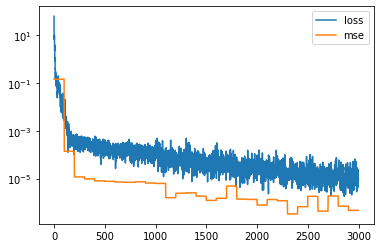

In [7]:
fig, ax = plt.subplots()
resu['loss'].plot(ax=ax)
resu['mse'].plot(ax=ax)
ax.set_yscale('log')
ax.legend();

Impose PSD


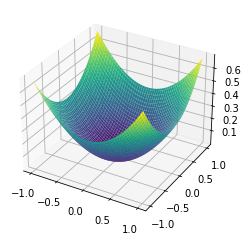

In [8]:
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)

X, Y = np.meshgrid(x, y)
space = lqr.getEvaluationPoints()

Z = network.computeValueFunction(space).reshape(-1, 100)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z.detach().cpu().numpy(), cmap='viridis');